# Script for Fig. 2A and 2B NVS et al. (2021)

In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import json
import os
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.insert(0, '/Users/natvan/CortexControl.app/Contents/MacOS/teili/')

from teili.tools.visualizer.DataViewers import PlotSettings
from teili.tools.visualizer.DataModels import EventsModel, StateVariablesModel
from teili.tools.visualizer.DataControllers import DataController, LineplotController, RasterplotController, HistogramController

from utils_natacha_3 import get_meanfiringrate_from_network_activity,get_network_activity_as_matrix, SpikeEvents, load_recordings_into_spikeevents
DC = DataController()

## MULTIPLE STIM (10 stimulations) to check inhib pop behavior and adapation from adaptive layer

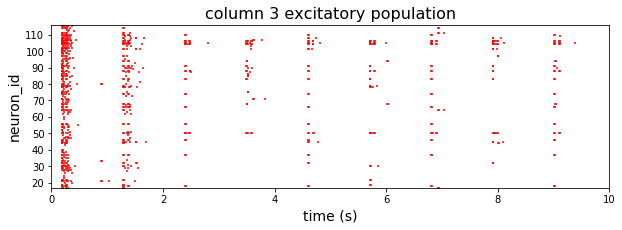

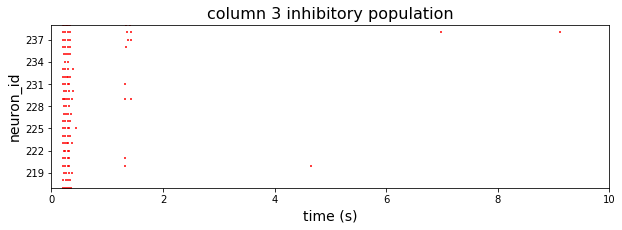

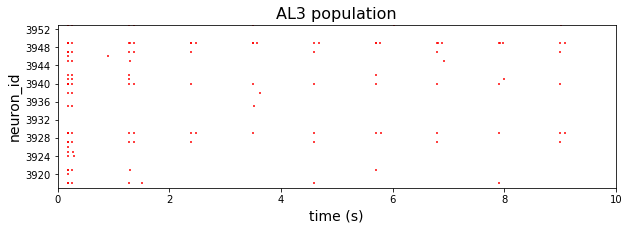

In [12]:
# TIME POINT FOR DEVIANT USED : [43, 62, 72, 94, 46, 71, 37, 39, 19, 18, 91, 77, 3, 60, 7, 74, 49, 16, 95, 73]
# load recordings
neuron_ids_col3 = list(range(17, 116+1))
neuron_ids_col3.remove(57)
neuron_ids_col3.remove(61)
neuron_ids_inh = list(range(217, 240))
neuron_ids_AL3 = list(range(3917,3954))


all_neuron_ids = neuron_ids_col3 + neuron_ids_inh + neuron_ids_AL3

min_neuron_id = np.min(all_neuron_ids)
max_neuron_id = np.max(all_neuron_ids)

network_activity_org = {}
all_active_neuron_ids = {}

rec_name_exc = 'TEST'
path_to_recording= '/Users/natvan/CortexControl_Study/rec/TEST/newb//164319_multiplestimCOL3_newb.json.json'
all_active_neuron_ids[rec_name_exc] = neuron_ids_col3
network_activity_org = {rec_name_exc: load_recordings_into_spikeevents(path_to_recording=path_to_recording, active_neuron_ids=all_active_neuron_ids[rec_name_exc])}

rec_name_inh = 'TESTI'
network_activity_org[rec_name_inh] = load_recordings_into_spikeevents(path_to_recording=path_to_recording, active_neuron_ids=neuron_ids_inh) #, column_core=core_nr_inh, column_chip=chip_nr_inh,reset_start_time=True, reset_neuron_ids=False)
all_active_neuron_ids[rec_name_inh] = neuron_ids_inh

rec_name_AL3 = 'AL3'
network_activity_org[rec_name_AL3] = load_recordings_into_spikeevents(path_to_recording=path_to_recording, active_neuron_ids=neuron_ids_AL3) #, column_core=core_nr_inh, column_chip=chip_nr_inh,reset_start_time=True, reset_neuron_ids=False)
all_active_neuron_ids[rec_name_AL3] = neuron_ids_AL3

# create rasterplot
fig, (ax) = plt.subplots(ncols=1, figsize=(10, 3))
rec_name_to_show = 'TEST' #f1 dev in OD
neuron_id_min = np.min(all_active_neuron_ids[rec_name_to_show])
neuron_id_max = np.max(all_active_neuron_ids[rec_name_to_show])
eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id', neuron_id_range=(neuron_id_min, neuron_id_max), 
                     title = 'column 3 excitatory population', time_range=(0, 10), mainfig=fig, subfig_rasterplot=ax, show_immediately=False)

# create rasterplot
fig, (ax) = plt.subplots(ncols=1, figsize=(10, 3))
rec_name_to_show = 'TESTI' #f1 dev in OD
neuron_id_min = np.min(all_active_neuron_ids[rec_name_to_show])
neuron_id_max = np.max(all_active_neuron_ids[rec_name_to_show])
eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id', neuron_id_range=(neuron_id_min, neuron_id_max), 
                     title = 'column 3 inhibitory population', time_range=(0, 10), mainfig=fig, subfig_rasterplot=ax, show_immediately=False)

# create rasterplot
fig, (ax) = plt.subplots(ncols=1, figsize=(10, 3))
rec_name_to_show = 'AL3' #f1 dev in OD
neuron_id_min = np.min(all_active_neuron_ids[rec_name_to_show])
neuron_id_max = np.max(all_active_neuron_ids[rec_name_to_show])
eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id', neuron_id_range=(neuron_id_min, neuron_id_max), 
                     title = 'AL3 population', time_range=(0, 10), mainfig=fig, subfig_rasterplot=ax, show_immediately=False)





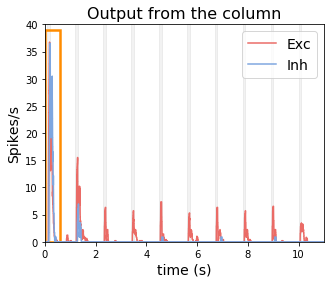

In [13]:
myplotsettings = PlotSettings(colors=[(0.917, 0.419, 0.4),(0.494, 0.650, 0.878)])

# get mean firing rate
t_start = 0
t_end = 11
step_size = 0.0001
window_size = 0.05

get_meanfiringrate_from_network_activity(network_activity=network_activity_org,
                                         max_neuron_id=max_neuron_id, t_start=t_start, t_end=t_end,
                                         step_size=step_size, window_size=window_size,
                                         pop_average=True, active_neuron_ids=all_active_neuron_ids)


# plot mfr over time 
fig, (ax) = plt.subplots(nrows = 1, figsize=(5,4))
column_events_exc = network_activity_org[rec_name_exc]
column_events_inh = network_activity_org[rec_name_inh]
data = [(column_events_exc, ('t_mfr', 'mfr')), (column_events_inh, ('t_mfr', 'mfr'))]
lp= LineplotController(DataModel_to_x_and_y_attr=data, subgroup_labels=['Exc', 'Inh'], y_range = (0,40), 
                       x_range=(t_start, t_end), title = 'Output from the column',xlabel='time (s)', 
                       ylabel='Spikes/s', mainfig=fig, subfig=ax, show_immediately=False, 
                       MyPlotSettings= myplotsettings) 


stim_times = [0.1, 1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 10]
stim_duration = 0.1
for stim_time in stim_times:
    ax.axvspan(stim_time, stim_time+stim_duration, alpha=0.1, color='grey', label='Stimulus')
handles, labels = plt.gca().get_legend_handles_labels()

# Create a Rectangle patch
rect = patches.Rectangle((0,0),0.6,39,linewidth=2.5,edgecolor='darkorange',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

#lp.viewer.mainfig.savefig('Paper1NVS_Fig4B.pdf')



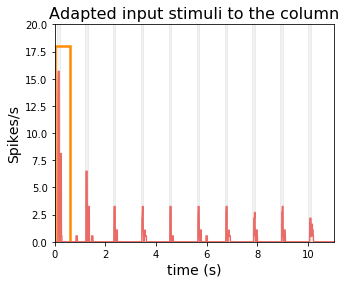

In [14]:
# plot mfr over time 

myplotsettings = PlotSettings(colors=[(0.917, 0.419, 0.4)])

# get mean firing rate
t_start = 0
t_end = 11
step_size = 0.0001
window_size = 0.05

get_meanfiringrate_from_network_activity(network_activity=network_activity_org,
                                         max_neuron_id=max_neuron_id, t_start=t_start, t_end=t_end,
                                         step_size=step_size, window_size=window_size,
                                         pop_average=True, active_neuron_ids=all_active_neuron_ids)

fig, (ax) = plt.subplots(nrows = 1, figsize=(5,4))
column_events_AL3 = network_activity_org[rec_name_AL3]
data = [(column_events_AL3, ('t_mfr', 'mfr'))]
lp= LineplotController(DataModel_to_x_and_y_attr=data, y_range = (0,20), x_range=(t_start, t_end), 
                       title = 'Adapted input stimuli to the column',xlabel='time (s)', ylabel='Spikes/s', 
                       mainfig=fig, subfig=ax, show_immediately=False, MyPlotSettings= myplotsettings) 


stim_times = [0.1, 1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 10]
stim_duration = 0.1
for stim_time in stim_times:
    ax.axvspan(stim_time, stim_time+stim_duration, alpha=0.1, color='grey', label='Stimulus')
handles, labels = plt.gca().get_legend_handles_labels()

# Create a Rectangle patch
rect = patches.Rectangle((0,0),0.6,18,linewidth=2.5,edgecolor='darkorange',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

#lp.viewer.mainfig.savefig('Paper1NVS_Fig4A.pdf')

# Extra data if required


## SINGLE STIM FIGURE PLOT IF REQUIRED

In [19]:
# TIME POINT FOR DEVIANT USED : [43, 62, 72, 94, 46, 71, 37, 39, 19, 18, 91, 77, 3, 60, 7, 74, 49, 16, 95, 73]
# load recordings
neuron_ids_col3 = list(range(17, 116+1))
neuron_ids_col3.remove(57)
neuron_ids_col3.remove(61)
neuron_ids_col3.remove(58)
neuron_ids_col3.remove(90)
neuron_ids_col3.remove(103)
neuron_ids_inh = list(range(217, 240))
all_neuron_ids = neuron_ids_col3 + neuron_ids_inh

min_neuron_id = np.min(all_neuron_ids)
max_neuron_id = np.max(all_neuron_ids)

network_activity_org = {}
all_active_neuron_ids = {}

rec_name_exc = 'TEST'
path_to_recording= '/Users/natvan/CortexControl_Study/rec/TEST/newb//144316_singlestimCOL3_newb.json.json'


all_active_neuron_ids[rec_name_exc] = neuron_ids_col3
network_activity_org = {rec_name_exc: load_recordings_into_spikeevents(path_to_recording=path_to_recording, active_neuron_ids=all_active_neuron_ids[rec_name_exc])}

rec_name_inh = 'TESTI'
network_activity_org[rec_name_inh] = load_recordings_into_spikeevents(path_to_recording=path_to_recording, active_neuron_ids=neuron_ids_inh) #, column_core=core_nr_inh, column_chip=chip_nr_inh,reset_start_time=True, reset_neuron_ids=False)
all_active_neuron_ids[rec_name_inh] = neuron_ids_inh


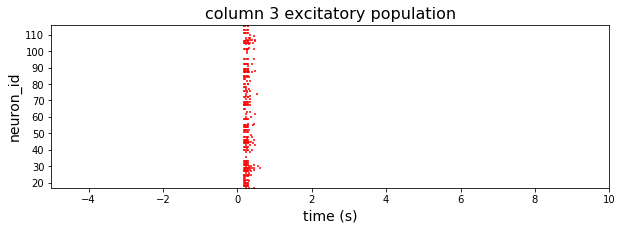

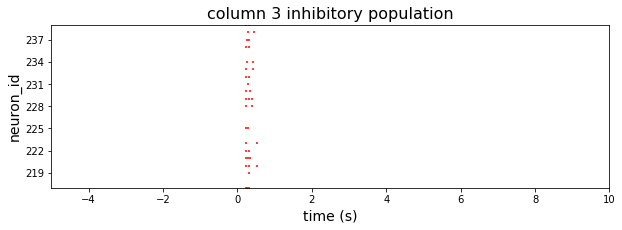

In [20]:
# create rasterplot

fig, (ax) = plt.subplots(ncols=1, figsize=(10, 3))
rec_name_to_show = 'TEST' #f1 dev in OD
neuron_id_min = np.min(all_active_neuron_ids[rec_name_to_show])
neuron_id_max = np.max(all_active_neuron_ids[rec_name_to_show])
eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id', neuron_id_range=(neuron_id_min, neuron_id_max), 
                     title = 'column 3 excitatory population', time_range=(-5, 10), mainfig=fig, subfig_rasterplot=ax, show_immediately=False)

# create rasterplot

fig, (ax) = plt.subplots(ncols=1, figsize=(10, 3))
rec_name_to_show = 'TESTI' #f1 dev in OD
neuron_id_min = np.min(all_active_neuron_ids[rec_name_to_show])
neuron_id_max = np.max(all_active_neuron_ids[rec_name_to_show])
eventsmodel  = EventsModel(neuron_ids=network_activity_org[rec_name_to_show].neuron_id, spike_times=network_activity_org[rec_name_to_show].ts)
RasterplotController([eventsmodel], xlabel='time (s)', ylabel='neuron_id', neuron_id_range=(neuron_id_min, neuron_id_max), 
                     title = 'column 3 inhibitory population', time_range=(-5, 10), mainfig=fig, subfig_rasterplot=ax, show_immediately=False)

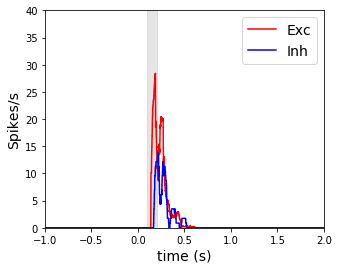

In [21]:
# to keep original throughout filtering actions
network_activity = deepcopy(network_activity_org)


# filter for time interval & normalize neuron_ids
t_start = -2  # [s]
t_end   = 2# [s]
for net_activity_org, net_activity in zip([network_activity_org], [network_activity]):
    for column_name, column_events in net_activity_org.items():
        net_activity[column_name].ts, net_activity[column_name].neuron_id = DC.filter_events(all_spike_times=column_events.ts, all_neuron_ids=column_events.neuron_id, interval=(t_start, t_end))

# get mean firing rate
t_start = -1
t_end = 2
step_size = 0.0001
window_size = 0.05

get_meanfiringrate_from_network_activity(network_activity=network_activity_org,
                                         max_neuron_id=max_neuron_id, t_start=t_start, t_end=t_end,
                                         step_size=step_size, window_size=window_size,
                                         pop_average=True, active_neuron_ids=all_active_neuron_ids)


# plot mfr over time with/without adaptation
fig, (ax) = plt.subplots(nrows = 1, figsize=(5,4))
column_events_exc = network_activity_org[rec_name_exc]
column_events_inh = network_activity_org[rec_name_inh]
data = [(column_events_exc, ('t_mfr', 'mfr')), (column_events_inh, ('t_mfr', 'mfr'))]
lp = LineplotController(DataModel_to_x_and_y_attr=data, subgroup_labels=['Exc', 'Inh'], y_range = (0,40), 
                        x_range=(t_start, t_end), title = None ,xlabel='time (s)', ylabel='Spikes/s', 
                        mainfig=fig, subfig=ax, show_immediately=False) 


# add stimulus times
stim_times = [0.1]
stim_duration = 0.1
for stim_time in stim_times:
    ax.axvspan(stim_time, stim_time+stim_duration, alpha=0.2, color='grey', label='Stimulus')
handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys()) 

#lp.viewer.mainfig.savefig('Singlestim.pdf')